<a href="https://colab.research.google.com/github/Rafa2266/MVP-Machine-Learning-Analytics/blob/master/mvp_sprint2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gdown
!pip install tensorflow

In [2]:
import pandas as pd
import gdown
import os
import zipfile
import shutil
from PIL import Image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

# Machine learning: Análise dos filmes da Netflix
## Introdução
O objetivo desse projeto é treinar um modelo de machine learning para identificar os fimes que vão receber uma nota no IMDB maior que 6.5, a parti dos atributos oferecidos pela base.

## Passo 1
Foi feito o downladda base de dados, selecionando apenas os filmes, e retirando todos os registros que possuem nulos nos atributos que vão ser utilizados.

Os atributos utilizados vão ser o "View rating" que consisite na classifição indicativa em uma representação categórica, o "Runtime" que consiste no tempo de duração do filme em uma representação categórica, o "Genre" que consiste no gênero do filme em uma representação categórica, o "Boxoffice" que consiste no custo do filme em uma representação numérica e o "IMDb Score" que consite na nota do IMDb que vai ser utilizado para criar o target do modelo de machine learning.

## Passo 2
Foi removido os registros que possuiam o 'View Rating' como 'approved' 'passed', pois foram considerados registros que não faziam sentido como classificação indicativa, aém daqueles que não receberam a classificação como os'not rated' e 'unrated'. Depois foi criado a coluna target para registrar como 'Bom' todo filme com nota maior que 6.5 no IMDb e o resto como 'Ruim'.

## Passo 3
Remoção de todas as coluna que não vão ser utilizados para o aprendizado do modelo. Estas colunas não vão ser utilizadas por representarem informações muito específicas de cada filme que poderia gerar um overfitting ('Summary', 'Actors','Production House', links e imagens, 'Writer', release dates, 'Director', 'Country Availability',  'Languages'),serem redundantes ('Tags', 'Series or Movie', 'IMDb Score'),ter informações conseguidas depois da nota do IMDb ('Awards Nominated For','Awards Received') e colunas relacioandas aos números de votantes e a utras votações pois estas não são atributos ligados diretamente ao filme.

## Passo 4
Agrupamento de todas as classifcações indicativas com um significado parecido em uma única classificação na coluna 'View Rating', em seguida agrupar todos os gêneros múltiplos que cada filme tem nos gêneros 'Comedy', 'Action' e 'Drama' na coluna 'Genre', além disso foi removido todos os registros que possuiam o 'View Rating' igual a 'G' ou 'NC-17' e também os registros que não se enquadravam  nos gêneros 'Comedy', 'Action' e 'Drama' por represntarem uma quantidade de registros infíma. Esses agrupamentos e remoções foram feitas no intuito de diminuir a disppersão dos dados.

In [3]:
#Passo 1

file_id ="1UiLaRdwW--fr-P3wapm6c3mv6Et7TYk5"
url = f"https://drive.google.com/uc?id={file_id}"
output ="netflix-rotten-tomatoes-metacritic-imdb - netflix-rotten-tomatoes-metacritic-imdb.csv"
gdown.download(url, output)

df=pd.read_csv("netflix-rotten-tomatoes-metacritic-imdb - netflix-rotten-tomatoes-metacritic-imdb.csv")
df=df[df['Series or Movie'].str.lower()=='movie']
df=df[df['View Rating'].notnull()]
df=df[df['Runtime'].notnull()]
df=df[df['Genre'].notnull()]
df=df[df['Boxoffice'].notnull()]
df=df[df['IMDb Score'].notnull()]
#Passo 2
df=df[df['View Rating'].str.lower()!='approved']
df=df[df['View Rating'].str.lower()!='passed']
df=df[(df['View Rating'].str.lower()!='unrated') & (df['View Rating'].str.lower()!='not rated')]
df['target']=np.where(df['IMDb Score']>=6.5,'Bom','Ruim')
#Passo 3
dfc=df.drop(['Netflix Release Date','Image','TMDb Trailer','Trailer Site','Poster','Summary','Actors','Netflix Link','IMDb Link','IMDb Votes','Rotten Tomatoes Score',
             'Languages','Title','Series or Movie','Hidden Gem Score','Metacritic Score','Production House','Writer','Release Date','Director','Tags',
             'Awards Nominated For','Awards Received','Country Availability','IMDb Score',],axis=1)
#Passo 4
dfc['View Rating']=dfc['View Rating'].replace(['TV-Y','TV-G'],'G')
dfc['View Rating']=dfc['View Rating'].replace(['TV-Y7','GP','TV-PG','M/PG','TV-Y7-FV','E10+','E'],'PG')
dfc['View Rating']=dfc['View Rating'].replace(['TV-14'],'PG-13')
dfc['View Rating']=dfc['View Rating'].replace(['X'],'R')
dfc['View Rating']=dfc['View Rating'].replace(['TV-MA','MA-17'],'NC-17')

dfc['Genre']=np.where(dfc['Genre'].str.find("Action")!=-1,"Action",dfc['Genre'])
dfc['Genre']=np.where(dfc['Genre'].str.find("Comedy")!=-1,"Comedy",dfc['Genre'])
dfc['Genre']=np.where(dfc['Genre'].str.find("Drama")!=-1,"Drama",dfc['Genre'])


dfc=dfc[(dfc['View Rating']!='NC-17') & (dfc['View Rating']!='G')]
dfc=dfc[(dfc['Genre']=="Drama") | (dfc['Genre']=="Action") | (dfc['Genre']=="Comedy")]


Downloading...
From: https://drive.google.com/uc?id=1UiLaRdwW--fr-P3wapm6c3mv6Et7TYk5
To: /content/netflix-rotten-tomatoes-metacritic-imdb - netflix-rotten-tomatoes-metacritic-imdb.csv
100%|██████████| 14.8M/14.8M [00:00<00:00, 48.2MB/s]
<ipython-input-3-b8b415fc79cf>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target']=np.where(df['IMDb Score']>=6.5,'Bom','Ruim')


In [4]:
dfc

Genre   Runtime View Rating     Boxoffice target
1      Comedy  1-2 hour           R       $70,632   Ruim
11      Drama  1-2 hour       PG-13   $20,578,909   Ruim
15      Drama  1-2 hour           R  $335,451,311    Bom
16     Action  1-2 hour          PG  $474,544,677    Bom
17      Drama  1-2 hour       PG-13  $381,409,310    Bom
...       ...       ...         ...           ...    ...
15459  Comedy  1-2 hour       PG-13      $101,196    Bom
15460   Drama   > 2 hrs       PG-13  $281,287,133   Ruim
15461  Action  1-2 hour       PG-13   $26,414,527   Ruim
15464  Action  1-2 hour           R       $36,136    Bom
15465  Comedy  1-2 hour       PG-13   $57,231,747   Ruim

[2976 rows x 5 columns]

## Passo 5
A transformação dos valores monetários do 'Boxoffice' de string para inteiro, além da codificação de todos os outros atributos e o target de valores categóricos para valores numéricos. Estas transformações foram feitas com o intuito de permitir o aprendizado do modelo a parti desses atributos.

In [5]:
#Passo 5
le = LabelEncoder()
dfc['Boxoffice']=dfc['Boxoffice'].str.replace(r'\D', '', regex=True)
dfc["Genre"]=le.fit_transform(dfc["Genre"]);
dfc["Runtime"]=le.fit_transform(dfc["Runtime"]);
dfc["View Rating"]=le.fit_transform(dfc["View Rating"]);
dfc["target"]=le.fit_transform(dfc["target"]);

In [6]:
dfc

Genre  Runtime  View Rating  Boxoffice  target
1          1        0            2      70632       1
11         2        0            1   20578909       1
15         2        0            2  335451311       0
16         0        0            0  474544677       0
17         2        0            1  381409310       0
...      ...      ...          ...        ...     ...
15459      1        0            1     101196       0
15460      2        3            1  281287133       1
15461      0        0            1   26414527       1
15464      0        0            2      36136       0
15465      1        0            1   57231747       1

[2976 rows x 5 columns]

## Passo 6
A separação em conjunto de treinamento e conjunto de teste dos dados do dataset. Além da configuração das variáveis do kfold para validação cruzada.

In [7]:
#Passo 6
X = dfc[['Genre','Runtime','View Rating','Boxoffice']] # atributos
Y = dfc['target'] # classe (target)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=7) # faz a divisão
num_particoes = 20 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=12) # faz o particionamento em 20 folds

np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []


# Passo 7
A instanciação de diversos modelos de machine learning, aplicando a normalização através dos pipelines, para realizar a validação cruzada desses modelos e exibir os resultados comparando a acurácia de cada modelo.

KNN: 0.620168 (0.040178)
CART: 0.597059 (0.034798)
NB: 0.619748 (0.049278)
SVM: 0.644118 (0.051066)


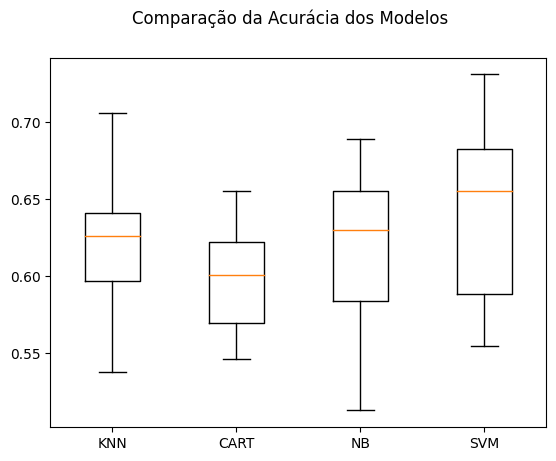

In [8]:
#Passo 7
min_max_scaler = ('MinMaxScaler', MinMaxScaler())
models.append(('KNN', Pipeline([min_max_scaler,('KNN',KNeighborsClassifier())])))
models.append(('CART', Pipeline([min_max_scaler,('CART',DecisionTreeClassifier())])))
models.append(('NB', Pipeline([min_max_scaler,('NB',GaussianNB())])))
models.append(('SVM', Pipeline([min_max_scaler,('SVM',SVC())])))

for name, model in models:
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Passo 8
A instanciação de diversos modelos de machine learning para serem inseridos em diversos métodos ensemble, além da criação de diversos atributos para serem usados nos métodos.

## Passo 9
A instanciação dos métodos ensemble aplicando a normalização através dos pipelines, para realizar a validação cruzada desses modelos e exibir os resultados comparando a acurácia de cada modelo.

Voting: 0.650000 (0.044170)
Bagging: 0.607983 (0.036944)
RF: 0.605882 (0.039585)
ET: 0.605042 (0.040737)
Ada: 0.644118 (0.050018)
GB: 0.649580 (0.048500)


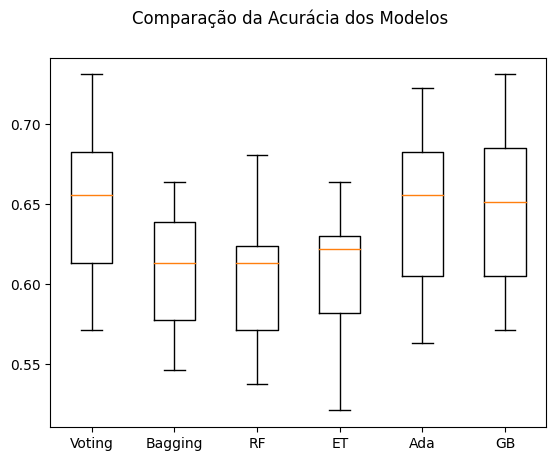

In [9]:
#Passo 8
models = []
results = []
names = []
bases = []

base = DecisionTreeClassifier()
num_trees = 150
max_features = 3

model1 = KNeighborsClassifier()
bases.append(('knn', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))
model4 = GaussianNB()
bases.append(('nb', model4))
model5 = LogisticRegression()
bases.append(('logistic', model5))
#Passo 9
models=[]
models.append(('Voting', Pipeline([min_max_scaler,('Vot',VotingClassifier(bases))])))
models.append(('Bagging', Pipeline([min_max_scaler,('Bag',BaggingClassifier(estimator=base, n_estimators=num_trees))])))
models.append(('RF', Pipeline([min_max_scaler,('RF',RandomForestClassifier(n_estimators=num_trees, max_features=max_features))])))
models.append(('ET', Pipeline([min_max_scaler,('ET',ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))])))
models.append(('Ada', Pipeline([min_max_scaler,('Ada',AdaBoostClassifier(n_estimators=num_trees))])))
models.append(('GB', Pipeline([min_max_scaler,('GB',GradientBoostingClassifier(n_estimators=num_trees))])))

for name, model in models:
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()



## Passo 10
Foram pegos os 4 modelos que tiveram a melhor avaliação na validação cruzada, e foi feito o treinamento deles com o conjunto de treinamento e depois foi realizado a medição da acurácia de cada um deles com o conjunto de teste, exibindo em seguida os resultados.

O modelo que utiliza o algoritmo do AdaBoost é o que apresenta o melhor resultado com 70,13% de acurácia.

In [10]:
#Passo 10
models2=[]
models2.append(('Ada', Pipeline([min_max_scaler,('Ada',AdaBoostClassifier(n_estimators=num_trees))])))
models2.append(('Voting', Pipeline([min_max_scaler,('Vot',VotingClassifier(bases))])))
models2.append(('GB', Pipeline([min_max_scaler,('gb',GradientBoostingClassifier(n_estimators=num_trees))])))
models2.append(('SVM', Pipeline([min_max_scaler,('SVM',SVC())])))
for name,model in models2:
  model.fit(X_train, Y_train)
  # Fazendo as predições com o conjunto de teste
  predictions = model.predict(X_test)
  # Estimando a acurácia no conjunto de teste
  print(name,': ',accuracy_score(Y_test, predictions))

Ada :  0.7013422818791947
Voting :  0.6879194630872483
GB :  0.6929530201342282
SVM :  0.6812080536912751


## Passo 11
Vamos utilizar o feature_selection para tentar melhorar a acurácia do modelo, selecionando as três melhores colunas do dataset dos parâmetros.A coluna excluida foi a do 'View Rating'

In [11]:
#Passo 11

best_var = SelectKBest(score_func=f_classif, k=3)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, Y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dfc.columns[0:4])

# Exibe as pontuações de cada atributos e os 3 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dfc.columns[0:4]))

X_train, X_test, Y_train, Y_test = train_test_split(features, Y, test_size=0.20, random_state=7) # faz a divisão
num_particoes = 20 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=12) # faz o particionamento em 20 folds

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []




Número original de atributos: 4

Número reduzido de atributos: 3

Atributos Originais: Index(['Genre', 'Runtime', 'View Rating', 'Boxoffice'], dtype='object')

Scores dos Atributos Originais: [115.317 207.329  22.403  45.917]

Atributos Selecionados: ['Genre' 'Runtime' 'Boxoffice']


## Passo 12
Repetição do passo 7 depois da aplicação do feature selection.

KNN: 0.618487 (0.040161)
CART: 0.588235 (0.031442)
NB: 0.592437 (0.044188)
SVM: 0.639496 (0.051247)


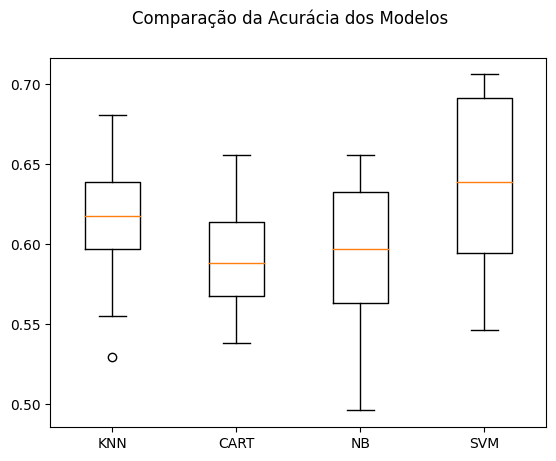

In [12]:
#Passo 12
min_max_scaler = ('MinMaxScaler', MinMaxScaler())
models.append(('KNN', Pipeline([min_max_scaler,('KNN',KNeighborsClassifier())])))
models.append(('CART', Pipeline([min_max_scaler,('CART',DecisionTreeClassifier())])))
models.append(('NB', Pipeline([min_max_scaler,('NB',GaussianNB())])))
models.append(('SVM', Pipeline([min_max_scaler,('SVM',SVC())])))

for name, model in models:
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Passo 13
Repetição dos passos 8 e 9 depois da aplicação do feature selection.

Voting: 0.633193 (0.047483)
Bagging: 0.590336 (0.030050)
RF: 0.592437 (0.029049)
ET: 0.592857 (0.024996)
Ada: 0.633193 (0.051341)
GB: 0.644118 (0.045818)


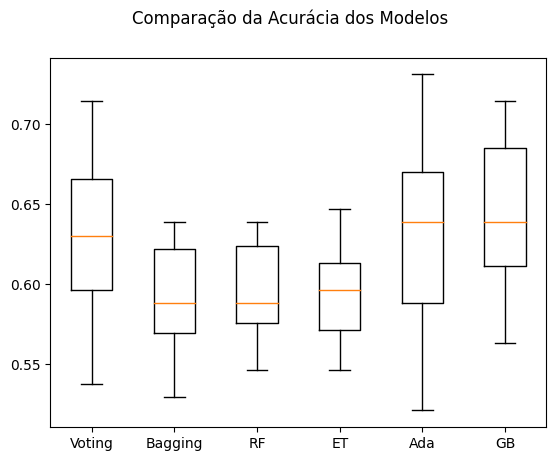

In [13]:
#Passo 13
models = []
results = []
names = []
bases = []

base = DecisionTreeClassifier()
num_trees = 150
max_features = 3

model1 = KNeighborsClassifier()
bases.append(('knn', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))
model4 = GaussianNB()
bases.append(('nb', model4))
model5 = LogisticRegression()
bases.append(('logistic', model5))

models=[]
models.append(('Voting', Pipeline([min_max_scaler,('Vot',VotingClassifier(bases))])))
models.append(('Bagging', Pipeline([min_max_scaler,('Bag',BaggingClassifier(estimator=base, n_estimators=num_trees))])))
models.append(('RF', Pipeline([min_max_scaler,('RF',RandomForestClassifier(n_estimators=num_trees, max_features=max_features))])))
models.append(('ET', Pipeline([min_max_scaler,('ET',ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))])))
models.append(('Ada', Pipeline([min_max_scaler,('Ada',AdaBoostClassifier(n_estimators=num_trees))])))
models.append(('GB', Pipeline([min_max_scaler,('GB',GradientBoostingClassifier(n_estimators=num_trees))])))

for name, model in models:
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()



## Passo 14
Repetição do passo 10 utilizando os melhores modelos treinados com o dataset filtrado pela feature selection.

O modelo que utiliza o algoritmo do AdaBoost continua sendo o que apresenta o melhor resultado com 68,79% de acurácia.

In [14]:
#Passo 14
models2=[]
models2.append(('Ada', Pipeline([min_max_scaler,('Ada',AdaBoostClassifier(n_estimators=num_trees))])))
models2.append(('Voting', Pipeline([min_max_scaler,('Vot',VotingClassifier(bases))])))
models2.append(('GB', Pipeline([min_max_scaler,('gb',GradientBoostingClassifier(n_estimators=num_trees))])))
models2.append(('SVM', Pipeline([min_max_scaler,('SVM',SVC())])))
for name,model in models2:
  model.fit(X_train, Y_train)
  # Fazendo as predições com o conjunto de teste
  predictions = model.predict(X_test)
  # Estimando a acurácia no conjunto de teste
  print(name,': ',accuracy_score(Y_test, predictions))


Ada :  0.6879194630872483
Voting :  0.6812080536912751
GB :  0.662751677852349
SVM :  0.6862416107382551


## Conclusão
O melhor modelo é o AdaBoost que não teve o dataset de treinamento filtrado pela feature selection. Apresentando uma acurácia de 70,13%.

# Deep Learning; Redes Neurais Convolucionais (CNNs): Pizzas e Burgers
## Introdução
O objetivo desse projeto é treinar um modelo para identificar se uma imagem está mostrando um hambúrger ou uma pizza, classificando a imagem em uma dessas duas classes. O algoritmo utilizado será o das redes neurais convolucionais(que foram criadas justamente para atuar no reconhecimento de imagens),este algoritmo  possui uma camada de entrada, camadas escondidas e uma camada de saída. Para o treinamento vai ser usando a extensão do tensorflow.

## Passo 1
Fazer o download do banco de imagens em um arquivo zip, e depois descompacta-lo e guardar os arquivos na pasta dataset/images.

## Passo 2
Escolher quais classes de imagens vão ser utilizadas para o treinamento, validação e teste do modelo (nesse caso vai ser a classe 'Pizza' e a classe 'Burger'), além disso também será feito a padronização da altura e largura das imagens e serão excluídas imagens que estão em formatos que não podem ser lidos pelo algoritmo de treinamento do modelo.

In [3]:
#Passo 1
file_id ="1RzzfK0cK2Zt7MQADzmrQITqCYlqNFBVB"
url = f"https://drive.google.com/uc?id={file_id}"

folder_path = "./dataset"
os.makedirs(folder_path, exist_ok=True)

output ="dataset/Fast_Food_Classification_V2.zip"
gdown.download(url, output)

destination = 'dataset/images/' # path onde se encontra o arquivo 'train.zip'

os.makedirs(destination,exist_ok=True) # cria a pasta de destino se necessário

with zipfile.ZipFile(output,'r') as zip_ref:
    zip_ref.extractall(destination)

#Passo 2
class_names = ['Burger','Pizza']

dataset_dir = os.path.join(os.getcwd(), 'dataset/images/Fast Food Classification V2')
dataset_train_dir = os.path.join(dataset_dir, 'Train')
datasetTrainLen=[]
datasetTrainLen.append(('Baked Potato',os.listdir(os.path.join(dataset_train_dir, 'Baked Potato'))))
datasetTrainLen.append(('Burger',os.listdir(os.path.join(dataset_train_dir, 'Burger'))))
datasetTrainLen.append(('Crispy Chicken',os.listdir(os.path.join(dataset_train_dir, 'Crispy Chicken'))))
datasetTrainLen.append(('Donut',os.listdir(os.path.join(dataset_train_dir, 'Donut'))))
datasetTrainLen.append(('Fries',os.listdir(os.path.join(dataset_train_dir, 'Fries'))))
datasetTrainLen.append(('Hot Dog',os.listdir(os.path.join(dataset_train_dir, 'Hot Dog'))))
datasetTrainLen.append(('Pizza',os.listdir(os.path.join(dataset_train_dir, 'Pizza'))))
datasetTrainLen.append(('Sandwich',os.listdir(os.path.join(dataset_train_dir, 'Sandwich'))))
datasetTrainLen.append(('Taco',os.listdir(os.path.join(dataset_train_dir, 'Taco'))))
datasetTrainLen.append(('Taquito',os.listdir(os.path.join(dataset_train_dir, 'Taquito'))))

dataset_test_dir = os.path.join(dataset_dir, 'Test')
datasetTestLen=[]
datasetTestLen.append(('Baked Potato',os.listdir(os.path.join(dataset_test_dir, 'Baked Potato'))))
datasetTestLen.append(('Burger',os.listdir(os.path.join(dataset_test_dir, 'Burger'))))
datasetTestLen.append(('Crispy Chicken',os.listdir(os.path.join(dataset_test_dir, 'Crispy Chicken'))))
datasetTestLen.append(('Donut',os.listdir(os.path.join(dataset_test_dir, 'Donut'))))
datasetTestLen.append(('Fries',os.listdir(os.path.join(dataset_test_dir, 'Fries'))))
datasetTestLen.append(('Hot Dog',os.listdir(os.path.join(dataset_test_dir, 'Hot Dog'))))
datasetTestLen.append(('Pizza',os.listdir(os.path.join(dataset_test_dir, 'Pizza'))))
datasetTestLen.append(('Sandwich',os.listdir(os.path.join(dataset_test_dir, 'Sandwich'))))
datasetTestLen.append(('Taco',os.listdir(os.path.join(dataset_test_dir, 'Taco'))))
datasetTestLen.append(('Taquito',os.listdir(os.path.join(dataset_test_dir, 'Taquito'))))

dataset_valid_dir = os.path.join(dataset_dir, 'Valid')
datasetValidLen=[]
datasetValidLen.append(('Baked Potato',os.listdir(os.path.join(dataset_valid_dir, 'Baked Potato'))))
datasetValidLen.append(('Burger',os.listdir(os.path.join(dataset_valid_dir, 'Burger'))))
datasetValidLen.append(('Crispy Chicken',os.listdir(os.path.join(dataset_valid_dir, 'Crispy Chicken'))))
datasetValidLen.append(('Donut',os.listdir(os.path.join(dataset_valid_dir, 'Donut'))))
datasetValidLen.append(('Fries',os.listdir(os.path.join(dataset_valid_dir, 'Fries'))))
datasetValidLen.append(('Hot Dog',os.listdir(os.path.join(dataset_valid_dir, 'Hot Dog'))))
datasetValidLen.append(('Pizza',os.listdir(os.path.join(dataset_valid_dir, 'Pizza'))))
datasetValidLen.append(('Sandwich',os.listdir(os.path.join(dataset_valid_dir, 'Sandwich'))))
datasetValidLen.append(('Taco',os.listdir(os.path.join(dataset_valid_dir, 'Taco'))))
datasetValidLen.append(('Taquito',os.listdir(os.path.join(dataset_valid_dir, 'Taquito'))))

width = 160
height = 160
for name,files in datasetTrainLen:
  if(name not in class_names):
      shutil.rmtree(dataset_train_dir+'/'+name)
      continue
  print(f"Train {name}: {len(files)}")

  for file in files:
    if('.jpeg' not in file and '.png' not in file):
      os.remove(dataset_train_dir+'/'+name+'/'+file)
      continue

    img = Image.open(dataset_train_dir+'/'+name+'/'+file)
    img_resized = img.resize((width, height))
    img_resized.save(dataset_train_dir+'/'+name+'/'+file)





for name,files in datasetValidLen:
  if(name not in class_names):
      shutil.rmtree(dataset_valid_dir+'/'+name)
      continue
  print(f"Valid {name}: {len(files)}")

  for file in files:
    if('.jpeg' not in file and '.png' not in file):
      os.remove(dataset_valid_dir+'/'+name+'/'+file)
      continue

    img = Image.open(dataset_valid_dir+'/'+name+'/'+file)
    img_resized = img.resize((width, height))
    img_resized.save(dataset_valid_dir+'/'+name+'/'+file)






for name,files in datasetTestLen:
  if(name not in class_names):
      shutil.rmtree(dataset_test_dir+'/'+name)
      continue
  print(f"Test {name}: {len(files)}")

  for file in files:
    if('.jpeg' not in file and '.png' not in file):
      os.remove(dataset_test_dir+'/'+name+'/'+file)
      continue

    img = Image.open(dataset_test_dir+'/'+name+'/'+file)
    img_resized = img.resize((width, height))
    img_resized.save(dataset_test_dir+'/'+name+'/'+file)

Downloading...
From: https://drive.google.com/uc?id=1RzzfK0cK2Zt7MQADzmrQITqCYlqNFBVB
To: /content/dataset/Fast_Food_Classification_V2.zip
100%|██████████| 861M/861M [00:14<00:00, 57.6MB/s]


Train Burger: 1500
Train Pizza: 1500
Valid Burger: 300
Valid Pizza: 300
Test Burger: 200
Test Pizza: 200


## Passo 3
Definir os párâmetros que vão ser utilizados no pré processamento das imagens, como a altura e largura (que já foram definidas na padronização das imagens), além de definir como serão os parâmetros de cor das imagens, que possuirão um vetor de três posições com valores que variam de 0 a 255 (no estilo RGB).

## Passo 4
Declarar as variáveis que vão ser utilizadas no treinamento. Como o 'batch_size' que determina aquantidade de features que vão ser trazidas por vez do dataset, 'epochs' determina a quantidade de vezes que que o modelo vai ler todo o dataset no aprendizado, e o leraning rate é a taxa de aprendizado do modelo.

## Passo 5
Preencher os datasets de treinamento, validação e teste com as imagens separadas para cada um desses datasets, aplicando o pré-processamento nessas imagens.

In [4]:
#Passo 3
image_width = width
image_height = height
image_color_channel = 3
image_color_channel_size = 255
image_size = (image_width, image_height)
image_shape = image_size + (image_color_channel,)

#Passo 4
batch_size = 32
epochs = 20
learning_rate = 0.0001

#Passo 5
print("Treinamento")
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_train_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)
print("Validação")
dataset_valid = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_valid_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)
print("Teste")
dataset_test = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_test_dir,
    image_size = (image_width, image_height),
    batch_size = batch_size,
    shuffle = True
)

Treinamento
Found 3000 files belonging to 2 classes.
Validação
Found 600 files belonging to 2 classes.
Teste
Found 400 files belonging to 2 classes.


## Passo 6
Criação do modelo e definição das etapas que vão ser realizadas na montagem dele. Começando pelo rescaling que irá padronizar a largura e altura para o tamnho 160, e também vai normalizar o valores das cores de 0 a 255 para 0 a 1.

Em seguida se faz a aplicação de uma camada convolucional com 16 parâmetros (que representa a quantidade de vezes que o kernel será aplicado), um kernel de tamanho 3x3 e uma função de ativação relu que zera os valores negativos e mantem os positivos, e para consolidar os resultados obtidos pela função de ativação se utiliza a camada 'MaxPooling2D'. Esse processo se repete mais duas vezes apenas dobrando o número de parâmetros.

Em seguida se utiliza a camada Flatten para condensar todos esses parâmetros, depois aplicamos uma dense layer de 128 nós, cujos valores vão ser atualizados durante o treinamento e na saída também será aplicado a função de ativação relu.

Para finalizar aplicamos mais uma dense layer de apenas 1 nó (pois precisamos de apenas um valor na saída) com uma função de ativação sigmoid, pois como já garantimos que não vai ter valor negativo com a função de ativação relu, então a sigmoid vai garantir que todaos os valores estejam entre 0 e 1, tendo o 0 como representante da classe 'Burger' e 1 como representante da classe 'Pizza'

## Passo 7
Realizar a compilação do modelo com a função de otimização Adam (que irá configurar o treinamento para buscar o menor erro possível) junto com a taxa de aprendizado já estabelecida anteriormente, a loss function que vai ser a BinaryCrossentropy (que é ideal para modelos com apenas duas classes), e por fim as métricas que vão ser observadas que no caso é a 'accuracy'.

In [17]:
#Passo 6
model=tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(
        1./image_color_channel_size
    , input_shape = image_shape),
    tf.keras.layers.Conv2D(16,3,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),

])
#Passo 7
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)
model.build(image_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 160, 160, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 160, 160, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 80, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 40, 40, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 64)        1

## Passo 8
Definir que o modelo irá parar o treinamento quando a métrica 'loss' não for modificada ao longo de 3 'epochs' atravé do 'early_stopping'. Em seguida treinar o modelo com os dados de treinamento e validação, utilizar o número de 'epochs' já estabelecidos e utilizar o 'early_stopping' no callback.

In [18]:
# Passo 8
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3)

history = model.fit(
    dataset_train,
    validation_data = dataset_valid,
    epochs = epochs,
    callbacks = [
        early_stopping
    ]
)

Epoch 1/20
94/94 [==============================] - 101s 1s/step - loss: 0.6323 - accuracy: 0.6357 - val_loss: 0.5797 - val_accuracy: 0.7317
Epoch 2/20
94/94 [==============================] - 95s 1s/step - loss: 0.5007 - accuracy: 0.7777 - val_loss: 0.5000 - val_accuracy: 0.7733
Epoch 3/20
94/94 [==============================] - 92s 979ms/step - loss: 0.4205 - accuracy: 0.8247 - val_loss: 0.3980 - val_accuracy: 0.8250
Epoch 4/20
94/94 [==============================] - 99s 1s/step - loss: 0.3629 - accuracy: 0.8470 - val_loss: 0.3726 - val_accuracy: 0.8417
Epoch 5/20
94/94 [==============================] - 96s 1s/step - loss: 0.3387 - accuracy: 0.8550 - val_loss: 0.3504 - val_accuracy: 0.8500
Epoch 6/20
94/94 [==============================] - 93s 992ms/step - loss: 0.3089 - accuracy: 0.8673 - val_loss: 0.3470 - val_accuracy: 0.8433
Epoch 7/20
94/94 [==============================] - 92s 966ms/step - loss: 0.3011 - accuracy: 0.8750 - val_loss: 0.3474 - val_accuracy: 0.8583
Epoch 8/20

## Passo 9
Se percebe de acordo com os gráficos que o modelo possui uma acurácia próxima de 86% para os dados de validação e próxima de 97% para os dados de treinamento, o que demonstra que o modelo sofre com overfitting, pois a acurácia do dataset de treinamento é relativamente maior do que a de validação, e omesmo é observável nas taxas de perdas com uma perda muito maior no dataset de validação

<Figure size 640x480 with 0 Axes>

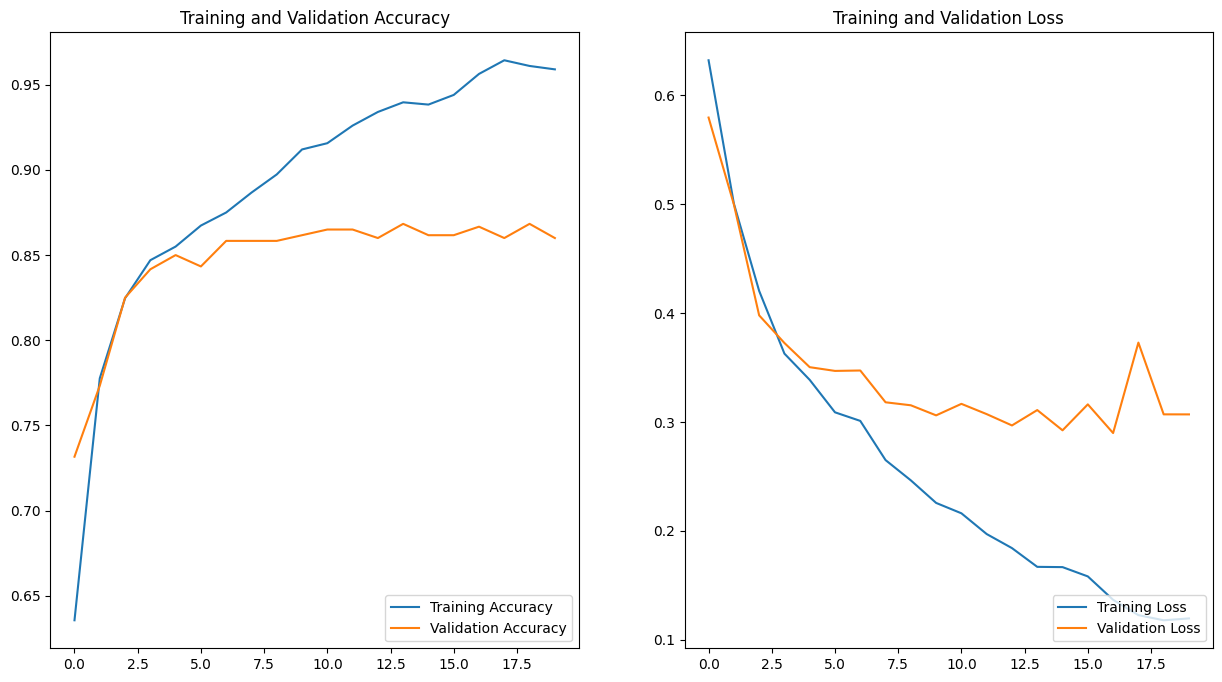

In [20]:
def plot_model():

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.gcf().clear()
    plt.figure(figsize = (15, 8))

    plt.subplot(1, 2, 1)
    plt.title('Training and Validation Accuracy')
    plt.plot(epochs_range, accuracy, label = 'Training Accuracy')
    plt.plot(epochs_range, val_accuracy, label = 'Validation Accuracy')
    plt.legend(loc = 'lower right')

    plt.subplot(1, 2, 2)
    plt.title('Training and Validation Loss')
    plt.plot(epochs_range, loss, label = 'Training Loss')
    plt.plot(epochs_range, val_loss, label = 'Validation Loss')
    plt.legend(loc = 'lower right')

    plt.show()
plot_model()

## Passo 10
Como último passo para a aprovação do modelo, ele vai ser utilizado para classificar as imagens de teste.

E a acurácia obtida foi de aproximadamente 86%, além disso também foi exebida algumas imagens e suas respectivas classificações dadas pelo modelo.

13/13 [==============================] - 3s 223ms/step - loss: 0.3289 - accuracy: 0.8625
Dataset Test Loss:     0.3289080858230591
Dataset Test Accuracy: 0.862500011920929
Labels:      [0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0]
Predictions: [1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0]


<Figure size 640x480 with 0 Axes>

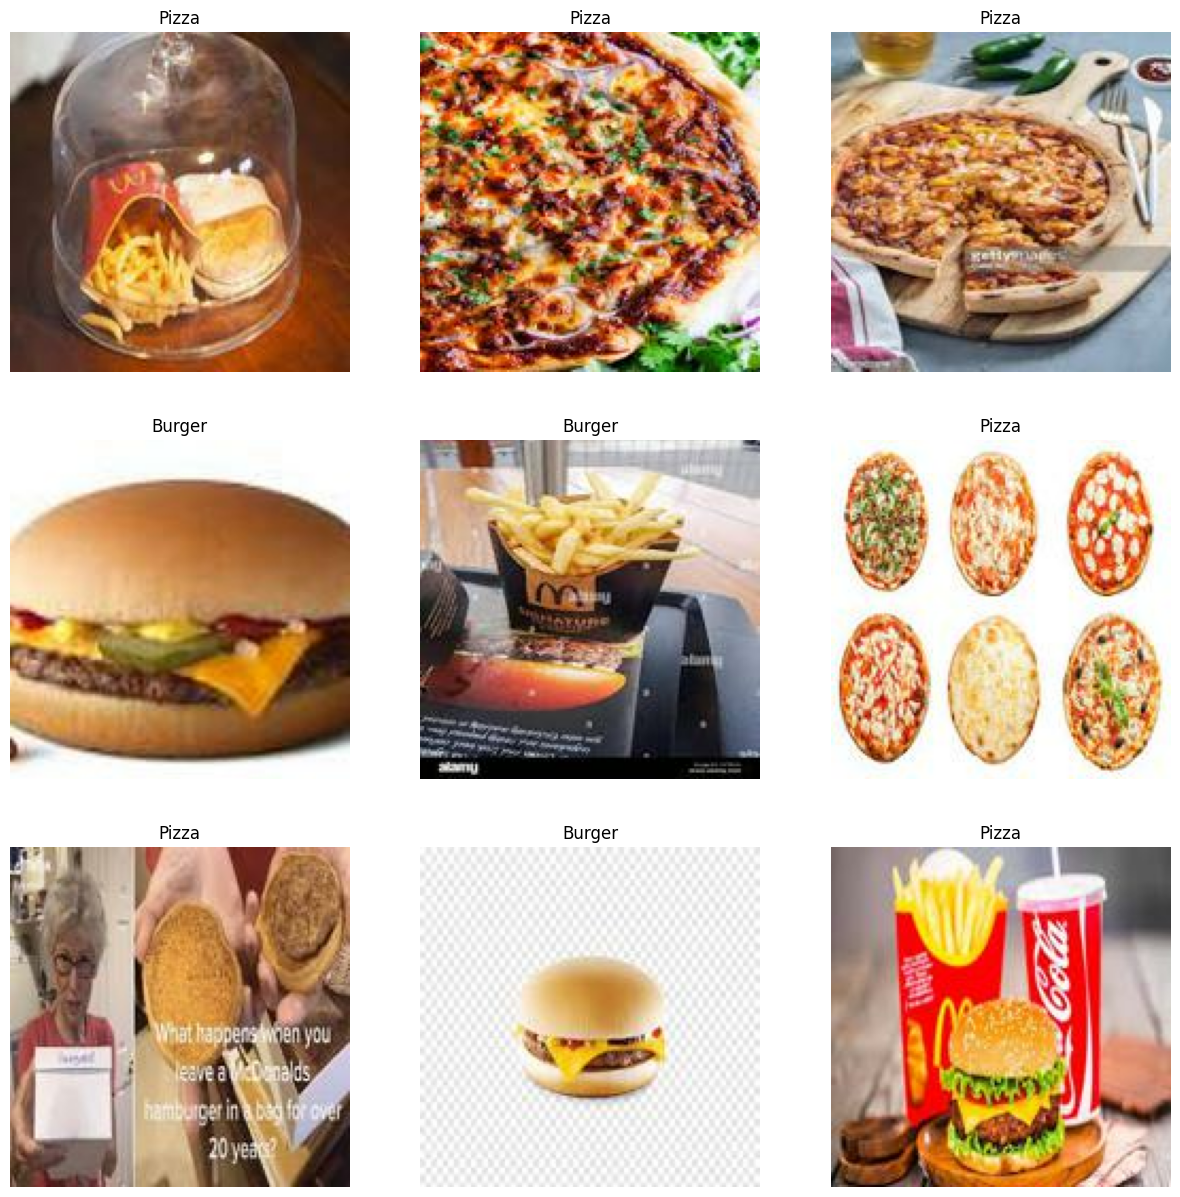

In [21]:
dataset_test_loss, dataset_test_accuracy = model.evaluate(dataset_test)

print('Dataset Test Loss:     %s' % dataset_test_loss)
print('Dataset Test Accuracy: %s' % dataset_test_accuracy)

def plot_dataset_predictions(dataset):

    features, labels = dataset_test.as_numpy_iterator().next()

    predictions = model.predict_on_batch(features).flatten()
    predictions = tf.where(predictions < 0.5, 0, 1)

    print('Labels:      %s' % labels)
    print('Predictions: %s' % predictions.numpy())

    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for i in range(9):

        plt.subplot(3, 3, i + 1)
        plt.axis('off')

        plt.imshow(features[i].astype('uint8'))
        plt.title(class_names[predictions[i]])
plot_dataset_predictions(dataset_test)

## Passo 11
Como o modelo estava com problemas de overffiting, vai ser feito outra versão do modelo aplicando diferentes técnicas.

A primeira seria aumentar a quantidade de imagens gerando diferentes versões da mesma imagem, conseguida através da aplicação de zoom nas imagens, ou mudando o posicionamento da imagem para a horizontal, ou então rotacionando levemente a imagem. Isto será feito aplicando o método de Data Augmentation.

## Passo 12
Utilizar a técnica de transfer learning, que permiti utilizar parte do apendizado de outro modelo no nosso, nesse caso vai ser utilizado o modelo do 'MobileNetV2', que é um modelo que já foi pré-treinado com uma quantidade massiva de dados além de ser otimizado para a classificação de imagens, possuindo um grande número de camadas.

In [9]:
#Passo 11
data_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
])

#Passo 12
model_transfer_learning = tf.keras.applications.MobileNetV2(input_shape = image_shape, include_top = False, weights = 'imagenet')
model_transfer_learning.trainable = False

model_transfer_learning.summary()



Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

## Passo 13
Nessa versão do modelo também aplicaremos o rescaling para padronizar o tamanho das imagens e normalizar os valores das cores das imagens, com a única diferença que o valor das cores vai variar de 1 a -1 (pois o modelo pré-treinado não aceita valores de 0 a 1 para as cores).

## Passo 14
Organizar a sequencia de execução do treinamento do modelo que passa pelo 'rescaling',' data_augmentation', 'model_tranfer_learning', o 'GlobalAveragePooling2D'(que consolida o activation da camada convolucional em um valor médio),o 'Dropout (que ajuda a evitar o overfitting distibuindo o poder de decisão entre os parâmetros das camadas, o método faz isso desativando certos parametros durante certas fases do treinamento), e por fim o o output que retornará apenas um valor, com uma função de ativação sigmoid, garantindo que o valor vai ser entre 0 e 1, o que representa as classes 'Burger' e 'Pizza'.

## Passo 15
Realizar a mesma compilação feita no passo 7 na nova versão do modelo.


In [10]:
#Passo 13
rescaling = tf.keras.layers.experimental.preprocessing.Rescaling(1. / (image_color_channel_size / 2.), offset = -1, input_shape = image_shape)

#Passo 14
model = tf.keras.models.Sequential([
    rescaling,
    data_augmentation,
    model_transfer_learning,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
#Passo 15
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 160, 160, 3)       0         
                                                                 
 sequential_2 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                

## Passo 16
Realizar o treinamento da nova versão do modelo como feito no passo 8.

In [11]:
#Passo 16
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3)

history = model.fit(
    dataset_train,
    validation_data = dataset_valid,
    epochs = epochs,
    callbacks = [
        early_stopping
    ]
)

Epoch 1/20
94/94 [==============================] - 88s 898ms/step - loss: 0.6516 - accuracy: 0.6343 - val_loss: 0.4691 - val_accuracy: 0.8217
Epoch 2/20
94/94 [==============================] - 79s 840ms/step - loss: 0.4305 - accuracy: 0.8150 - val_loss: 0.3138 - val_accuracy: 0.9117
Epoch 3/20
94/94 [==============================] - 88s 936ms/step - loss: 0.3200 - accuracy: 0.8863 - val_loss: 0.2372 - val_accuracy: 0.9350
Epoch 4/20
94/94 [==============================] - 86s 918ms/step - loss: 0.2626 - accuracy: 0.9100 - val_loss: 0.1923 - val_accuracy: 0.9417
Epoch 5/20
94/94 [==============================] - 77s 817ms/step - loss: 0.2221 - accuracy: 0.9253 - val_loss: 0.1646 - val_accuracy: 0.9500
Epoch 6/20
94/94 [==============================] - 81s 859ms/step - loss: 0.2020 - accuracy: 0.9320 - val_loss: 0.1428 - val_accuracy: 0.9533
Epoch 7/20
94/94 [==============================] - 78s 834ms/step - loss: 0.1765 - accuracy: 0.9427 - val_loss: 0.1323 - val_accuracy: 0.9533

## Passo 17
Se percebe de acordo com os gráficos que a nova versão do modelo possui uma acurácia póxima de 98% para os dados de validação e próxima de 96% para os dados de treinamento ,valores bem próximos de acurácia para os dois datasets, o que demonstra que o modelo não sofre com overfitting (pois a acurácia nos dados de validação é alta), nem underfitting (pois a acurácia nos dados de treinamento também é alta). Além disso também é observável que a taxa de erro vai caindo de forma contínua.

<Figure size 640x480 with 0 Axes>

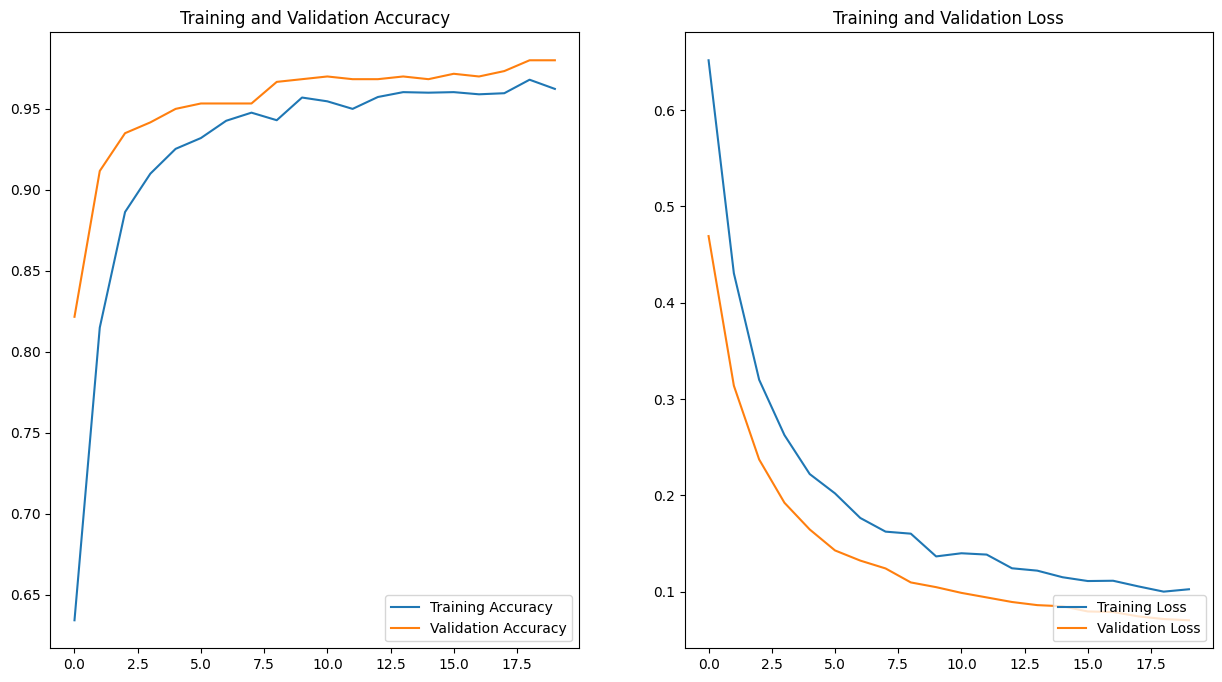

In [12]:
#Passo 17
def plot_model():

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.gcf().clear()
    plt.figure(figsize = (15, 8))

    plt.subplot(1, 2, 1)
    plt.title('Training and Validation Accuracy')
    plt.plot(epochs_range, accuracy, label = 'Training Accuracy')
    plt.plot(epochs_range, val_accuracy, label = 'Validation Accuracy')
    plt.legend(loc = 'lower right')

    plt.subplot(1, 2, 2)
    plt.title('Training and Validation Loss')
    plt.plot(epochs_range, loss, label = 'Training Loss')
    plt.plot(epochs_range, val_loss, label = 'Validation Loss')
    plt.legend(loc = 'lower right')

    plt.show()
plot_model()

## Passo 18
Como último passo para a aprovação da nova versão do modelo, ele vai ser utilizado para classificar as imagens de teste.

E a acurácia obtida foi próxima de 98%, além disso também foi exibida algumas imagens e suas respectivas classificações dadas pelo modelo.


13/13 [==============================] - 13s 967ms/step - loss: 0.0753 - accuracy: 0.9775
Dataset Test Loss:     0.07528067380189896
Dataset Test Accuracy: 0.9775000214576721
Labels:      [1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1]
Predictions: [1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1]


<Figure size 640x480 with 0 Axes>

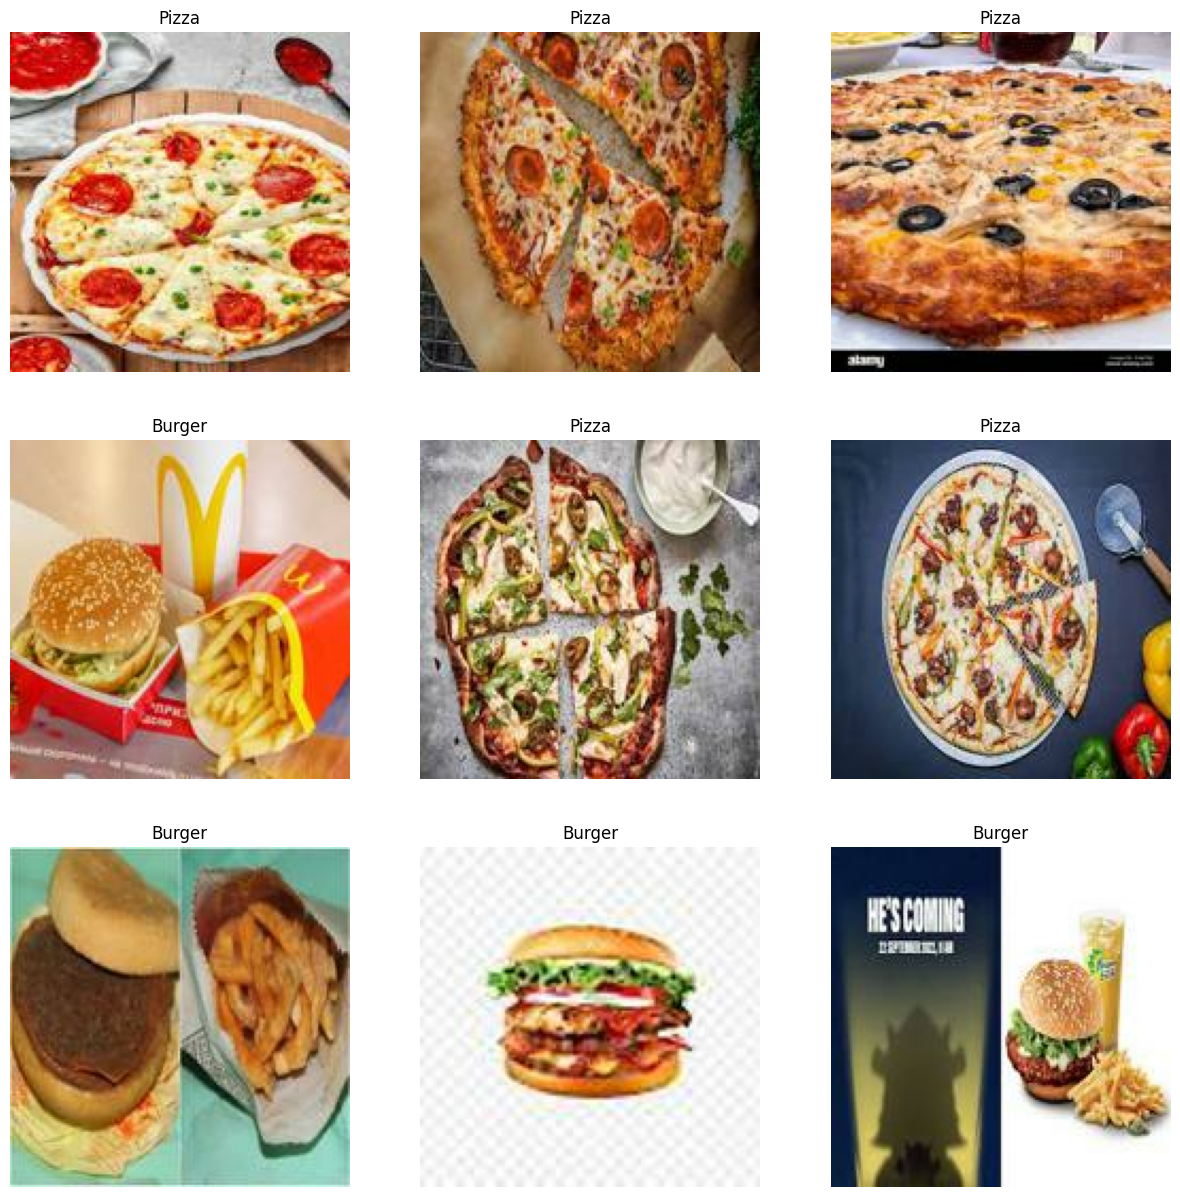

In [13]:
#Passo 18
dataset_test_loss, dataset_test_accuracy = model.evaluate(dataset_test)

print('Dataset Test Loss:     %s' % dataset_test_loss)
print('Dataset Test Accuracy: %s' % dataset_test_accuracy)

def plot_dataset_predictions(dataset):

    features, labels = dataset_test.as_numpy_iterator().next()

    predictions = model.predict_on_batch(features).flatten()
    predictions = tf.where(predictions < 0.5, 0, 1)

    print('Labels:      %s' % labels)
    print('Predictions: %s' % predictions.numpy())

    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for i in range(9):

        plt.subplot(3, 3, i + 1)
        plt.axis('off')

        plt.imshow(features[i].astype('uint8'))
        plt.title(class_names[predictions[i]])
plot_dataset_predictions(dataset_test)

## Conclusão
A nova versão do modelo, com uma acurácia próxima de 98%, apresentou um resultado superior a antiga versão do modelo, que possuia uma acurácia de aproximadamente 86,5%. Com isso concluimos que os métodos de transfência de aprendizado, data augmentation e dropout realmente trouxeram uma melhora no desempenho do modelo.